In [2]:
from typing import Annotated
from typing_extensions import TypedDict

# Langchain/graph modules
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

# Import Model
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

# Import environment variables
from dotenv import load_dotenv
load_dotenv()

# Import visualization library
from IPython.display import Image,display

In [ ]:
# Define Class state for messages
class State(TypedDict):
    messages:Annotated[list,add_messages]

# testing node functionality
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

llm = ChatGroq(model="llama3-8b-8192")
print(llm)

In [ ]:
graph_builder = StateGraph(State)

# Adding node
graph_builder.add_node("llmchat", chatbot) 

# Adding Edges
graph_builder.add_edge(START,"llmchat")
graph_builder.add_edge("llmchat", END)

# Compile The graph
graph = graph_builder.compile(name="Agent_test")

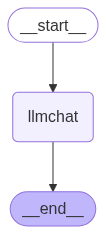

Visualization not supported in this environment.


In [5]:
try:
    img = display(Image(graph.get_graph().draw_mermaid_png()))
    with open("graph.png", "wb") as f:
        f.write(img.data)
except Exception:
    print("Visualization not supported in this environment.")

In [8]:
response = graph.invoke({"messages": "Hi"})


In [9]:
response["messages"]

[HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='81885f60-b71a-4569-a8f9-68bb2c1b6223'),
 AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 11, 'total_tokens': 37, 'completion_time': 0.032155717, 'prompt_time': 0.002654547, 'queue_time': 0.049354845, 'total_time': 0.034810264}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_24ec19897b', 'finish_reason': 'stop', 'logprobs': None}, id='run--8c12847e-c5c2-419a-9934-097427cdd204-0', usage_metadata={'input_tokens': 11, 'output_tokens': 26, 'total_tokens': 37})]

In [11]:
response["messages"][-1]

AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 11, 'total_tokens': 37, 'completion_time': 0.032155717, 'prompt_time': 0.002654547, 'queue_time': 0.049354845, 'total_time': 0.034810264}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_24ec19897b', 'finish_reason': 'stop', 'logprobs': None}, id='run--8c12847e-c5c2-419a-9934-097427cdd204-0', usage_metadata={'input_tokens': 11, 'output_tokens': 26, 'total_tokens': 37})

In [12]:
response["messages"][-1].content

"Hi! It's nice to meet you. Is there something I can help you with, or would you like to chat?"